<a href="https://colab.research.google.com/github/cleitonmoya/MAE001_Trabalho2/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAE001 - Projeto \#2 

MAE001 - Modelagem Matemática em Finanças I \\
Professor: Marco A. Cabral

Alunos:
* Cleiton Moya de Almeida
* Gustaco Maciel Ribeiro
* Renato Santana


## Introdução

## Importação das Séries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.reset_option('display.float_format')
np.set_printoptions(precision=2)
pd.options.display.precision = 2

In [26]:
# Séries financeiras
dir = 'https://raw.githubusercontent.com/cleitonmoya/MAE001_Trabalho2/main/series/'
series = ['IBOV', 'BBDC4', 'ITUB4', 'CSNA3', 'GGBR4', 'B3SA3',
                  'PETR4', 'MGLU3', 'ABEV3', 'WEGE3', 'VIVT4']
url = dir + 'IBOV' + '.csv'

# Cria primeiro um dataframe somente com o IBOV
df = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data', 'Fechamento'], header=0)
df.columns=['IBOV']

# Carrega as demais séries para o dataframe
for _,ativo in enumerate(series):
  url = dir + ativo + '.csv'
  df[ativo] = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data','Fechamento'])

# Ordena o dataframe por data crescente (a fim de permitir correta localização)
df.sort_index(inplace=True) 
df = df.loc['2015-01-01':'2019-12-31'] # período analisado

Visualização das séries importadas:

In [27]:
df

,IBOV,BBDC4,ITUB4,CSNA3,GGBR4,B3SA3,PETR4,MGLU3,ABEV3,WEGE3,VIVT4
Data,,,,,,,,,,,
2015-01-02,48512.22,13.01,13.81,4.21,8.40,7.88,8.79,0.22,13.95,10.82,31.81
2015-01-05,47516.82,13.04,13.88,4.05,8.04,7.65,8.08,0.23,13.64,10.76,31.68
2015-01-06,48000.92,13.46,14.11,4.32,8.94,7.72,7.82,0.22,14.04,10.59,31.40
2015-01-07,49462.91,14.00,14.62,4.79,9.61,8.05,8.14,0.23,14.38,10.58,31.98
2015-01-08,49943.30,14.07,14.85,4.68,9.43,7.97,8.62,0.23,14.43,10.71,32.31
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,115121.08,32.13,35.24,13.79,19.12,47.23,29.91,12.13,18.91,33.62,54.29
2019-12-23,115863.29,32.33,35.56,14.51,19.43,45.08,30.15,12.16,18.96,33.55,54.78
2019-12-26,117203.20,32.73,36.10,14.48,19.85,44.87,30.55,12.25,19.22,34.60,55.26


## Questão 1

## Questão 2

* Setor Financeiro:
   * Banco Bradesco (BBDC4);
   * Banco Itaú-Unibanco (ITUB4);
* Setor de Siderurgia:
   * Companhia Siderúrigica Nacional (CSNA3)
   * Grupo Gerdau (GGBR4)
 


Cálculo do retorno percentual:

In [28]:
df_ret = df.pct_change().iloc[1:,:] # matriz de retornos

Análise de correlação das ações com o IBOV:

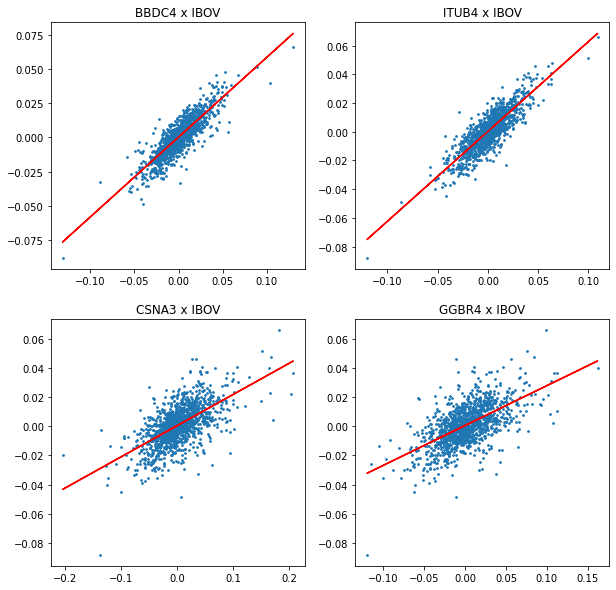

In [29]:
from scipy.stats import linregress
df_ret = df.pct_change().iloc[1:,:] # matriz de retornos

fig, axs = plt.subplots(2, 2,figsize=(10,10))
y = df_ret.IBOV
x = df_ret.BBDC4
axs[0,0].set_title('BBDC4 x IBOV')
axs[0,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,0].plot(x, m*x+b, c='r')

x = df_ret.ITUB4
axs[0,1].set_title('ITUB4 x IBOV')
axs[0,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,1].plot(x, m*x+b, c='r')

x = df_ret.CSNA3
axs[1,0].set_title('CSNA3 x IBOV')
axs[1,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,0].plot(x, m*x+b, c='r')

x = df_ret.GGBR4
axs[1,1].set_title('GGBR4 x IBOV')
axs[1,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,1].plot(x, m*x+b, c='r')

plt.show()

Podemos observar que BBDC4 e ITUB possuem forte correlação com o IBOV.

Ativos ativos do mesmo setor:

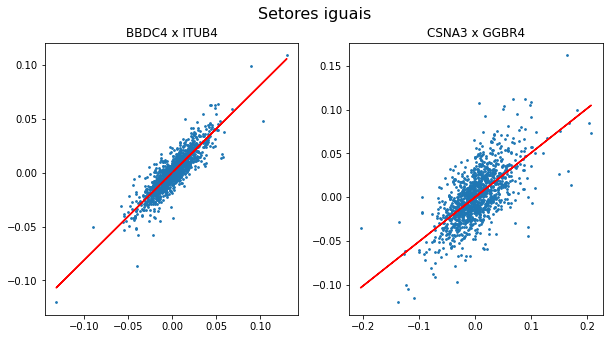

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Setores iguais', fontsize=16)
axs[0].set_title('BBDC4 x ITUB4')
x = df_ret.BBDC4
y = df_ret.ITUB4
axs[0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0].plot(x, m*x+b, c='r')


axs[1].set_title('CSNA3 x GGBR4')
x = df_ret.CSNA3
y = df_ret.GGBR4
axs[1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1].plot(x, m*x+b, c='r')
plt.show()

Podemos observar que BBDC4 e ITUB4 possum forte correlação positiva, enquanto que CSNA3 e GGBR4 possuem correlação menor.

Ações de setores diferentes:

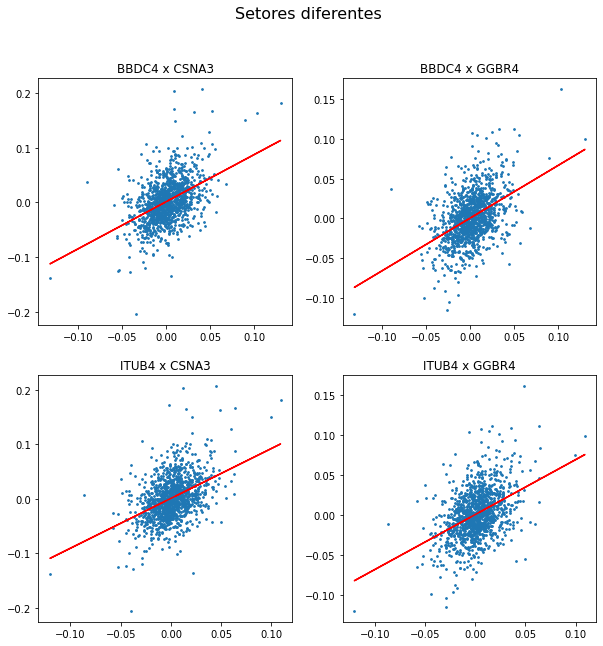

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Setores diferentes', fontsize=16)
axs[0,0].set_title('BBDC4 x CSNA3')
x = df_ret.BBDC4
y = df_ret.CSNA3
axs[0,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,0].plot(x, m*x+b, c='r')

axs[0,1].set_title('BBDC4 x GGBR4')
y = df_ret.GGBR4
axs[0,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,1].plot(x, m*x+b, c='r')

axs[1,0].set_title('ITUB4 x CSNA3')
x = df_ret.ITUB4
y = df_ret.CSNA3
axs[1,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,0].plot(x, m*x+b, c='r')

axs[1,1].set_title('ITUB4 x GGBR4')
y = df_ret.GGBR4
axs[1,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,1].plot(x, m*x+b, c='r')
plt.show()

Podemos melhor visualizar através da matriz de correlação plotada na forma de um mapa de calor:

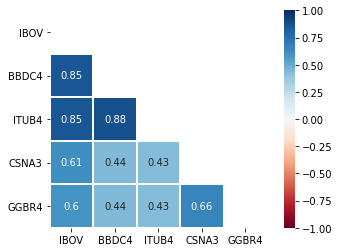

In [32]:
M_Cor = df_ret.iloc[:,:5].corr()
mask = np.triu(np.ones_like(M_Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(M_Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, annot=True, square=True)
plt.yticks(rotation=0) 
plt.show()

## Questão 3

Ativos escolhidos:
* BBDC4 - Bradesco
* ITUB4 - Itaú-Unibanco
* CSNA3 - CSN
* GGBR4 - Grupo Gerdau
* B3SA3 - B3
* PETR4 - Petrobras
* MGLU3 - Magazine Luíza
* ABEV3 - Ambev
* WEGE3 - WEG
* VIVT4 - Vivo

Índice Sharpe dos ativos:

In [33]:
df_X = df.pct_change().iloc[1:,1:] # matriz de retornos diários

X_anual = (1+df_X.mean())**252-1   # retorno médio anualizado
Std_anual = df_X.std()*np.sqrt(252)
Var_anual = df_X.var()*252

df_S = pd.DataFrame(X_anual, columns=['Retorno'])
df_S['Risco_Std'] = Std_anual
df_S['Risco_Var'] = Var_anual
df_S['Sharpe'] = df_S.apply(lambda x: x['Retorno']/x['Risco_Std'],axis=1)
df_S

,Retorno,Risco_Std,Risco_Var,Sharpe
BBDC4,0.27,0.32,0.10,0.84
ITUB4,0.27,0.30,0.09,0.90
CSNA3,0.56,0.63,0.40,0.88
GGBR4,0.34,0.48,0.23,0.70
B3SA3,0.48,0.33,0.11,1.46
PETR4,0.46,0.50,0.25,0.91
MGLU3,2.11,0.81,0.66,2.60
ABEV3,0.09,0.22,0.05,0.40
WEGE3,0.32,0.28,0.08,1.13
VIVT4,0.15,0.25,0.06,0.61


Matriz de covariância:

In [34]:
df_X.cov()*252

,BBDC4,ITUB4,CSNA3,GGBR4,B3SA3,PETR4,MGLU3,ABEV3,WEGE3,VIVT4
BBDC4,0.10,0.08,0.09,0.07,0.07,0.10,0.06,0.03,0.04,0.04
ITUB4,0.08,0.09,0.08,0.06,0.06,0.09,0.06,0.03,0.04,0.03
CSNA3,0.09,0.08,0.40,0.20,0.08,0.15,0.10,0.04,0.04,0.04
GGBR4,0.07,0.06,0.20,0.23,0.06,0.11,0.07,0.03,0.04,0.03
B3SA3,0.07,0.06,0.08,0.06,0.11,0.09,0.06,0.03,0.03,0.03
PETR4,0.10,0.09,0.15,0.11,0.09,0.25,0.09,0.03,0.04,0.05
MGLU3,0.06,0.06,0.10,0.07,0.06,0.09,0.66,0.03,0.05,0.03
ABEV3,0.03,0.03,0.04,0.03,0.03,0.03,0.03,0.05,0.02,0.02
WEGE3,0.04,0.04,0.04,0.04,0.03,0.04,0.05,0.02,0.08,0.02
VIVT4,0.04,0.03,0.04,0.03,0.03,0.05,0.03,0.02,0.02,0.06


Matriz de correlação:

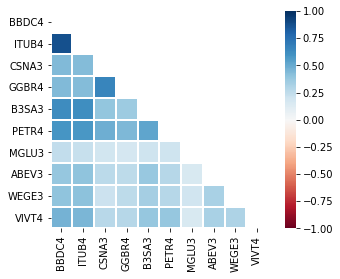

In [35]:
Cor = df_X.corr()
mask = np.triu(np.ones_like(Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, square=True) 
plt.show()

### Carteira Ótima

In [36]:
from scipy.optimize import minimize

Cov = df_X.cov().to_numpy()*252         # Matriz de covariância dos retornos anualizados
R = df_S['Retorno'].to_numpy()          # Retorno médio de cada ativo carteira

# Retorno esperado
def ret_esp(p):
  ret = R @ p
  return ret

def risco_esp(p):
  risco = np.sqrt(p.T @ Cov @ p)
  return risco

def neg_sharpe(p):
    ret = R @ p
    risco = np.sqrt(p.T @ Cov @ p)
    return -1*ret/risco

# Restrições da otimização
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1),
          (0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type':'eq', 'fun': lambda p: p.sum()-1})
p0 = [0.10]*10

result = minimize(neg_sharpe, p0, method='SLSQP', bounds=bounds, constraints=cons)
p_otm = result['x']
pd.DataFrame(p_otm.round(2), series[1:], columns=['%'])

,%
BBDC4,0.00
ITUB4,0.00
CSNA3,0.01
GGBR4,0.00
B3SA3,0.37
PETR4,0.00
MGLU3,0.43
ABEV3,0.00
WEGE3,0.19
VIVT4,0.00


In [37]:
p_otm_ret = R@p_otm
p_otm_std = np.sqrt(p_otm.T@Cov@p_otm)
print('Retorno:', p_otm_ret)
print('Risco:', p_otm_std)

Retorno: 1.1481172338880525
Risco: 0.41153852830411874


### Carteira de variância mínima:

In [38]:
cons = ({'type':'eq', 'fun': lambda p: p.sum()-1})
result = minimize(risco_esp, p0, method='SLSQP', bounds=bounds, constraints=cons)
p_min = result['x']
pd.DataFrame(p_min.round(2), series[1:], columns=['%'])

,%
BBDC4,0.00
ITUB4,0.01
CSNA3,0.00
GGBR4,0.00
B3SA3,0.03
PETR4,0.00
MGLU3,0.00
ABEV3,0.46
WEGE3,0.19
VIVT4,0.31


In [39]:
p_min_ret = R@p_min
p_min_std = np.sqrt(p_min.T@Cov@p_min)
print('Retorno:', p_min_ret)
print('Risco:', p_min_std)

Retorno: 0.16450584267471738
Risco: 0.1792400346475971


### Fronteira Eficiente:

In [40]:
carteiras_otm = []
ef_x = np.array([])
ef_y = np.linspace(p_min_ret, df_S.Retorno.max(),200)

# Minimização do risco
for ret in ef_y:
    cons = ({'type':'eq', 'fun': lambda p: p.sum()-1},
            {'type':'eq', 'fun': lambda p: ret_esp(p) - ret})
    
    # minimiza o risco para cada retorno
    result = minimize(risco_esp, p0, method='SLSQP', 
                      bounds=bounds, constraints=cons)
    
    ef_x = np.append(ef_x, result['fun'])
    carteiras_otm.append(result['x'])
carteiras_otm = np.array(carteiras_otm)

### Fronteira não-eficiente

In [41]:
nef_x = np.array([])
nef_y = np.linspace(df_S.Retorno.min(), p_min_ret, 200)
# Minimização do risco
for ret in nef_y:
    cons = ({'type':'eq', 'fun': lambda p: p.sum()-1},
            {'type':'eq', 'fun': lambda p: ret_esp(p) - ret})
    
    # minimiza o risco para cada retorno
    result = minimize(risco_esp, p0, method='SLSQP', 
                      bounds=bounds, constraints=cons)
    
    nef_x = np.append(nef_x, result['fun'])

### Bala de Markowitz:

Simulação de carteiras:

In [46]:
N_por = 100000 # número de carteiras simuladas
np.random.seed(42)
X = np.array([])
Std = np.array([])
for n in range(N_por):
  P = np.random.dirichlet(np.ones(10))
  X = np.append(X, R@P)                         # Retorno das carteiras
  Std = np.append(Std, np.sqrt(P.T@Cov@P))      # Risco (Std) das carteiras
S = X/Std # Índice Sharpe das Carteiras

Plota a Bala de Markowitz e as fronteiras:

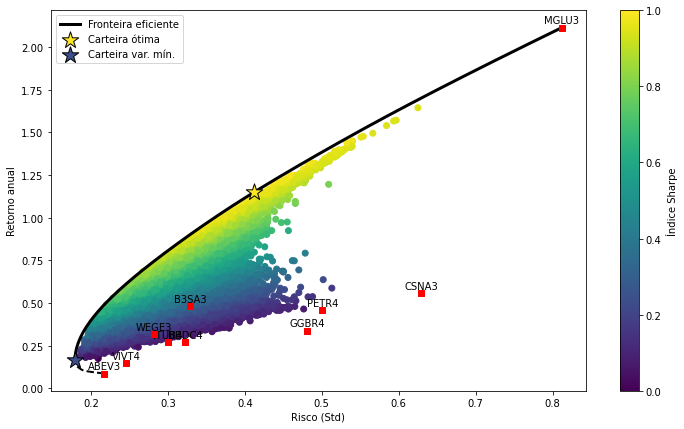

In [47]:
# Plota as carteiras simuladas
plt.figure(figsize=(12,7))
plt.xlabel('Risco (Std)')
plt.ylabel('Retorno anual')  
plt.scatter(Std, X, c=S, cmap='viridis')

# Plota a Fronteira Eficiente
plt.plot(ef_x,ef_y, 'k', linewidth=3, label='Fronteira eficiente')

# Plota fronteira não eficiente
plt.plot(nef_x,nef_y, 'k--', linewidth=2)

# Plota as carteiras mono-ativo
plt.scatter(df_S.Risco_Std, df_S.Retorno, marker='s', color='r', zorder=9)
plt.colorbar(label='Índice Sharpe')
for label, x, y in zip(series[1:], df_S['Risco_Std'], df_S['Retorno']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 2),
        textcoords='offset points', ha='center', va='bottom')

# Plota a carteira ótima e de variância mínima
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap 

normalize = Normalize(vmin=df_S.Sharpe.min(), vmax=df_S.Sharpe.max())
cmap = get_cmap('viridis')
cor_otm = cmap(normalize(p_otm_ret/p_otm_std))
cor_min = cmap(normalize(p_min_ret/p_min_std))

plt.scatter(p_otm_std, p_otm_ret, marker='*', color=cor_otm, edgecolors='k',
            cmap='viridis', s=300, label='Carteira ótima', zorder=10)

plt.scatter(p_min_std, p_min_ret, marker='*', color=cor_min, edgecolors='k',
            cmap='viridis', s=300, label='Carteira var. mín.', zorder=10)

plt.legend()
plt.show()

### Carteiras na Fronteira Eficiente 

Para verificar o efeito de concentração de ativos nas carteiras da fronteira efeiciente computamos, para cada valor de risco $R$, o percentual $\pi_i(R)$ de participação dos "top 5" ativos (os 5 ativos com maior peso na carteira).

In [48]:
df_carteiras_ef = pd.DataFrame(carteiras_otm, ef_x, columns=series[1:])
C = np.array([])
for k,_ in enumerate(ef_x):
  c = df_carteiras_ef.iloc[k].sort_values(ascending=False)[:5].sum()
  C = np.append(C,c)
df_carteiras_ef['Top 5'] = C
df_carteiras_ef

,BBDC4,ITUB4,CSNA3,GGBR4,B3SA3,PETR4,MGLU3,ABEV3,WEGE3,VIVT4,Top 5
0.18,0.00e+00,1.15e-02,0.00e+00,0.00e+00,3.13e-02,3.86e-17,6.62e-18,4.59e-01,1.89e-01,3.09e-01,1.00
0.18,2.25e-18,8.78e-03,0.00e+00,1.95e-04,4.01e-02,1.18e-17,3.18e-03,4.51e-01,1.92e-01,3.05e-01,1.00
0.18,4.66e-18,6.02e-03,2.69e-17,2.72e-04,4.54e-02,0.00e+00,7.18e-03,4.45e-01,1.92e-01,3.03e-01,0.99
0.18,8.50e-18,5.20e-03,0.00e+00,1.31e-04,5.02e-02,0.00e+00,1.12e-02,4.40e-01,1.93e-01,3.01e-01,0.99
0.18,0.00e+00,2.28e-03,2.54e-17,6.52e-04,5.44e-02,0.00e+00,1.54e-02,4.35e-01,1.94e-01,2.98e-01,1.00
...,...,...,...,...,...,...,...,...,...,...,...
0.79,2.78e-17,1.80e-16,0.00e+00,5.55e-17,2.40e-02,0.00e+00,9.76e-01,6.94e-17,1.39e-17,1.39e-17,1.00
0.80,0.00e+00,0.00e+00,2.78e-17,5.55e-17,1.80e-02,0.00e+00,9.82e-01,0.00e+00,0.00e+00,2.78e-17,1.00
0.80,0.00e+00,0.00e+00,5.55e-17,1.39e-17,1.20e-02,5.55e-17,9.88e-01,0.00e+00,2.78e-17,0.00e+00,1.00
0.81,0.00e+00,4.16e-17,9.71e-17,0.00e+00,6.00e-03,0.00e+00,9.94e-01,6.94e-17,6.94e-17,1.39e-17,1.00


Plotamos então participação de ativos na carteira, bem como a participação dos **top 5** ao longo da fronteira efieciente:

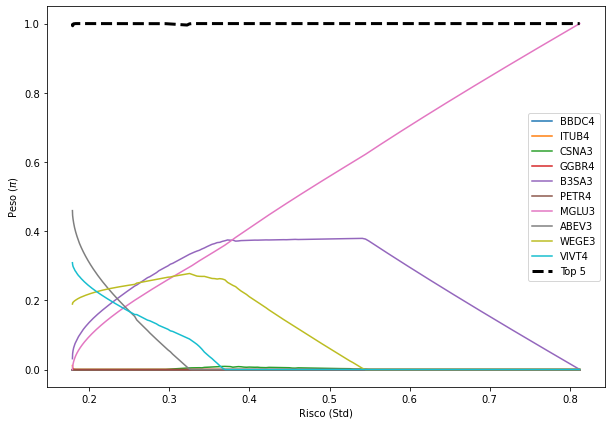

In [49]:
fig,ax = plt.subplots(figsize=(10,7))
for k,s in enumerate(df_carteiras_ef.columns.to_list()):
  if k == 10:
    ax.plot(df_carteiras_ef[s], 'k--', linewidth=3, label=s)
  else:
    ax.plot(df_carteiras_ef[s],label=s)
ax.set_xlabel('Risco (Std)')
ax.set_ylabel('Peso ($\pi$)')
ax.legend()
plt.show()

Podemos visualizar que ocorre concentração dos ativos nas carteiras da fronteira eficiente.

## Questão 4